In [1]:
import pandas as pd
import time
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
import matplotlib.pyplot as plt

# Creat driver

In [2]:
driver = webdriver.Chrome(ChromeDriverManager().install())

C:\Users\K. BOURGOU\AppData\Local\Temp\ipykernel_4076\1503906442.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())


In [3]:
page_url = "https://the-blacklist.fandom.com/wiki/Category:Characters"
driver.get(page_url)

### Skip cookies button

In [4]:
time.sleep(3)
from selenium.webdriver.common.by import By

driver.find_element(By.XPATH, '//div[text()="ACCEPT"]').click()

# Find Categories

In [5]:
character_categories = driver.find_elements(By.CLASS_NAME, 'category-page__member-link')

In [6]:
character_categories[0].text

'Category:Blacklist members'

In [7]:
character_categories[0].get_attribute('href')

'https://the-blacklist.fandom.com/wiki/Category:Blacklist_members'

In [8]:
driver.get(character_categories[0].get_attribute('href'))

In [9]:
character_elements = driver.find_elements(by=By.CLASS_NAME, value='category-page__member-link')

In [10]:
character_elements[0].text

'Abraham J. Stern'

# Setup and Categorize

In [11]:
## Setup chrome options
chrome_options = Options()
chrome_options.add_argument("--headless") # Ensure GUI is off
chrome_options.add_argument("--no-sandbox")

# Create service
webdriver_service = Service(ChromeDriverManager().install())

# Create driver
driver = webdriver.Chrome(service = webdriver_service, options = chrome_options)

# Go to the characters in category page
page_url = "https://the-blacklist.fandom.com/wiki/Category:Characters"
driver.get(page_url)

# # Accept cookies
time.sleep(3)
driver.find_element(By.XPATH, '//div[text()="ACCEPT"]').click()

# Find categories of characters
character_categories = driver.find_elements(By.CLASS_NAME, 'category-page__member-link')
categories_of_characters = []
for category in character_categories:
    category_type_url = category.get_attribute('href')
    category_type_name = category.text
    categories_of_characters.append({'name': category_type_name, "url": category_type_url})
categories_of_characters

[{'name': 'Category:Blacklist members',
  'url': 'https://the-blacklist.fandom.com/wiki/Category:Blacklist_members'},
 {'name': 'Category:Blacklist members active',
  'url': 'https://the-blacklist.fandom.com/wiki/Category:Blacklist_members_active'},
 {'name': 'Category:Blacklist members captured',
  'url': 'https://the-blacklist.fandom.com/wiki/Category:Blacklist_members_captured'},
 {'name': 'Category:Blacklist members deceased',
  'url': 'https://the-blacklist.fandom.com/wiki/Category:Blacklist_members_deceased'},
 {'name': 'Category:Blacklist members incarcerated',
  'url': 'https://the-blacklist.fandom.com/wiki/Category:Blacklist_members_incarcerated'},
 {'name': 'Category:Comic Character',
  'url': 'https://the-blacklist.fandom.com/wiki/Category:Comic_Character'},
 {'name': 'Category:Criminals',
  'url': 'https://the-blacklist.fandom.com/wiki/Category:Criminals'},
 {'name': 'Category:Deceased',
  'url': 'https://the-blacklist.fandom.com/wiki/Category:Deceased'},
 {'name': 'Categor

# Create characters_list

In [12]:
characters_list = []

for category in categories_of_characters:
    # go to category page
    driver.get(category['url'])
    
    character_elements = driver.find_elements(by=By.CLASS_NAME, value = 'category-page__member-link')
    
    for elements in character_elements:
        characters_list.append({'category': category['name'],'character': elements.text})

In [13]:
#list_to_DataFrame
pd.DataFrame(characters_list)

,category,character
0,Category:Blacklist members,Abraham J. Stern
1,Category:Blacklist members,Agathe Tyche
2,Category:Blacklist members,Alan Fitch
3,Category:Blacklist members,Alban Veseli
4,Category:Blacklist members,Albert Janus
...,...,...
1481,Category:Season 9 Characters,Tadashi Ito
1482,Category:Season 9 Characters,Tyson Lacroix
1483,Category:Season 9 Characters,Vlad Cvetko
1484,Category:Season 9 Characters,Weecha Xiu


In [14]:
#category Column
character_df = pd.DataFrame(characters_list)
character_df['category']

0         Category:Blacklist members
1         Category:Blacklist members
2         Category:Blacklist members
3         Category:Blacklist members
4         Category:Blacklist members
                    ...             
1481    Category:Season 9 Characters
1482    Category:Season 9 Characters
1483    Category:Season 9 Characters
1484    Category:Season 9 Characters
1485    Category:Season 9 Characters
Name: category, Length: 1486, dtype: object

In [15]:
#Remove "Category:" From category 
character_df['category'] = character_df['category'].map(lambda x: x.replace('Category:',''))
character_df

,category,character
0,Blacklist members,Abraham J. Stern
1,Blacklist members,Agathe Tyche
2,Blacklist members,Alan Fitch
3,Blacklist members,Alban Veseli
4,Blacklist members,Albert Janus
...,...,...
1481,Season 9 Characters,Tadashi Ito
1482,Season 9 Characters,Tyson Lacroix
1483,Season 9 Characters,Vlad Cvetko
1484,Season 9 Characters,Weecha Xiu


# Number of characters per category

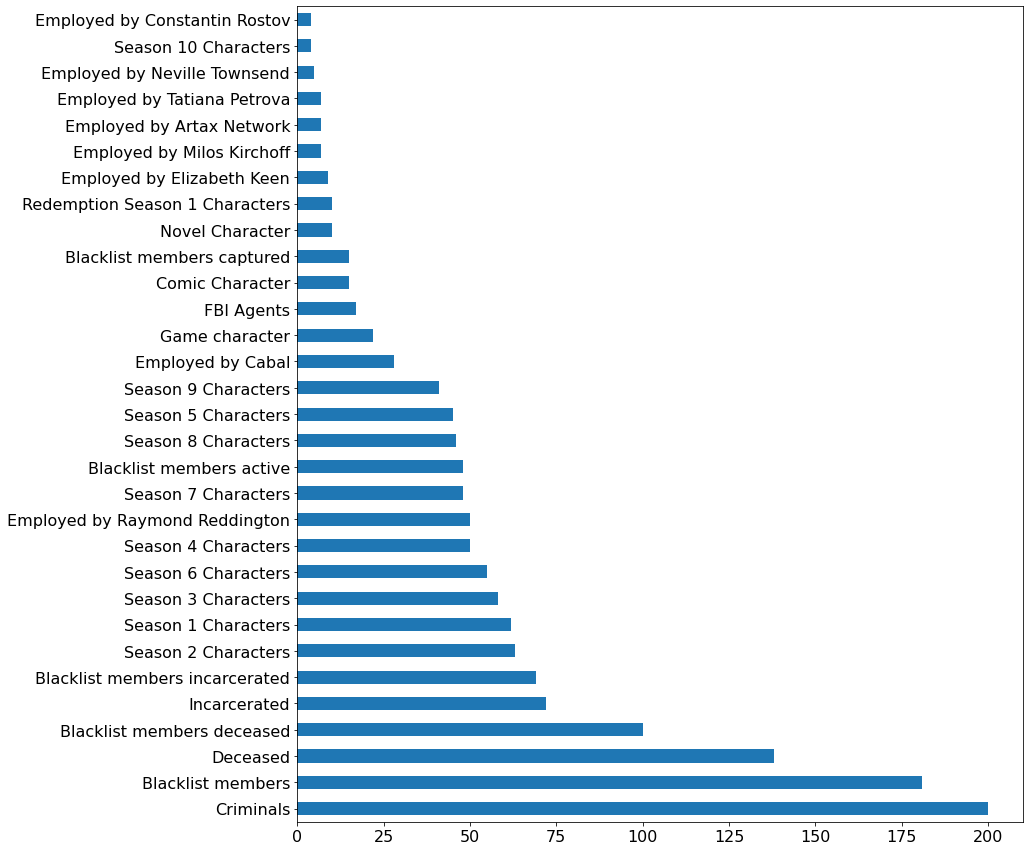

In [16]:
character_df['category'].value_counts().plot(kind="barh", figsize=(13,15), fontsize=16 )
plt.show()